In [102]:
import pandas as pd
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from astropy.cosmology import Planck18, z_at_value
import astropy.units as u

In [103]:
h5file = "/Users/22252335/Documents/DustMassDensity/data/all_data.h5"

In [104]:
with h5py.File(h5file, "r") as f:
    print("Top-level groups or datasets:")
    for key in f.keys():
        print(key)

Top-level groups or datasets:
EddingtonCorrection
EddingtonCorrectionSMF
LSSCorrection
cosmic
fit
lbtbins
lbtmids
vmax
zbins
zmids


In [105]:
def get_n_colors(n, cmap_name="viridis"):
    cmap = plt.get_cmap(cmap_name)  # Get colormap
    return [cmap(i / (n - 1)) for i in range(n)]  # Sample n colors

def MidFactor(n):
    # Create a list to store divisors
    divisors = []
    # Iterate from 1 to n and check divisibility
    for i in range(1, n + 1):
        if n % i == 0:
            # If 'i' divides 'n' evenly, it's a divisor
            divisors.append(i)
            
    return divisors[len(divisors)//2]
            
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.size']= 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['xtick.direction'] = "in"

plt.rcParams["xtick.major.size"] = 7
plt.rcParams["ytick.major.size"] = 7

plt.rcParams["xtick.minor.size"] = plt.rcParams["xtick.major.size"]/2.0
plt.rcParams["ytick.minor.size"] = plt.rcParams["ytick.major.size"]/2.0

plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

plt.rcParams['xtick.major.pad'] = 7

# Vmax plots

In [124]:
with h5py.File(h5file, "r") as f:
    zmids = np.array( f["zmids"][:] )  
    zbins = np.array( f["zbins"][:] )  
    lbtmids = np.array( f["lbtmids"][:] )  
    lbtbins = np.array( f["lbtbins"][:] )  
    LSSCorrection = np.array( f["LSSCorrection"][:] )  
    EddingtonCorrection = np.array( f["EddingtonCorrection"][:] )  

len(zmids)

16

In [125]:
dmf = []
for i in range(len(zmids)):
    dmf.append(pd.read_hdf(h5file, "vmax/Mdust/zb" + str(i+1)))

dmf_fit = []
for i in range(len(zmids)):
    dmf_fit.append(pd.read_hdf(h5file, "fit/Mdust/zb" + str(i+1)))

smf = []
for i in range(len(zmids)):
    smf.append(pd.read_hdf(h5file, "vmax/Mstar/zb" + str(i+1)))

smf_fit = []
for i in range(len(zmids)):
    smf_fit.append(pd.read_hdf(h5file, "fit/Mstar/zb" + str(i+1)))

# dlf = []
# for i in range(len(zmids)):
#     dlf.append(pd.read_hdf(h5file, "vmax/Ldust/zb" + str(i+1)))

# dlf_fit = []
# for i in range(len(zmids)):
#     dlf_fit.append(pd.read_hdf(h5file, "fit/Ldust/zb" + str(i+1)))

## Dust mass function

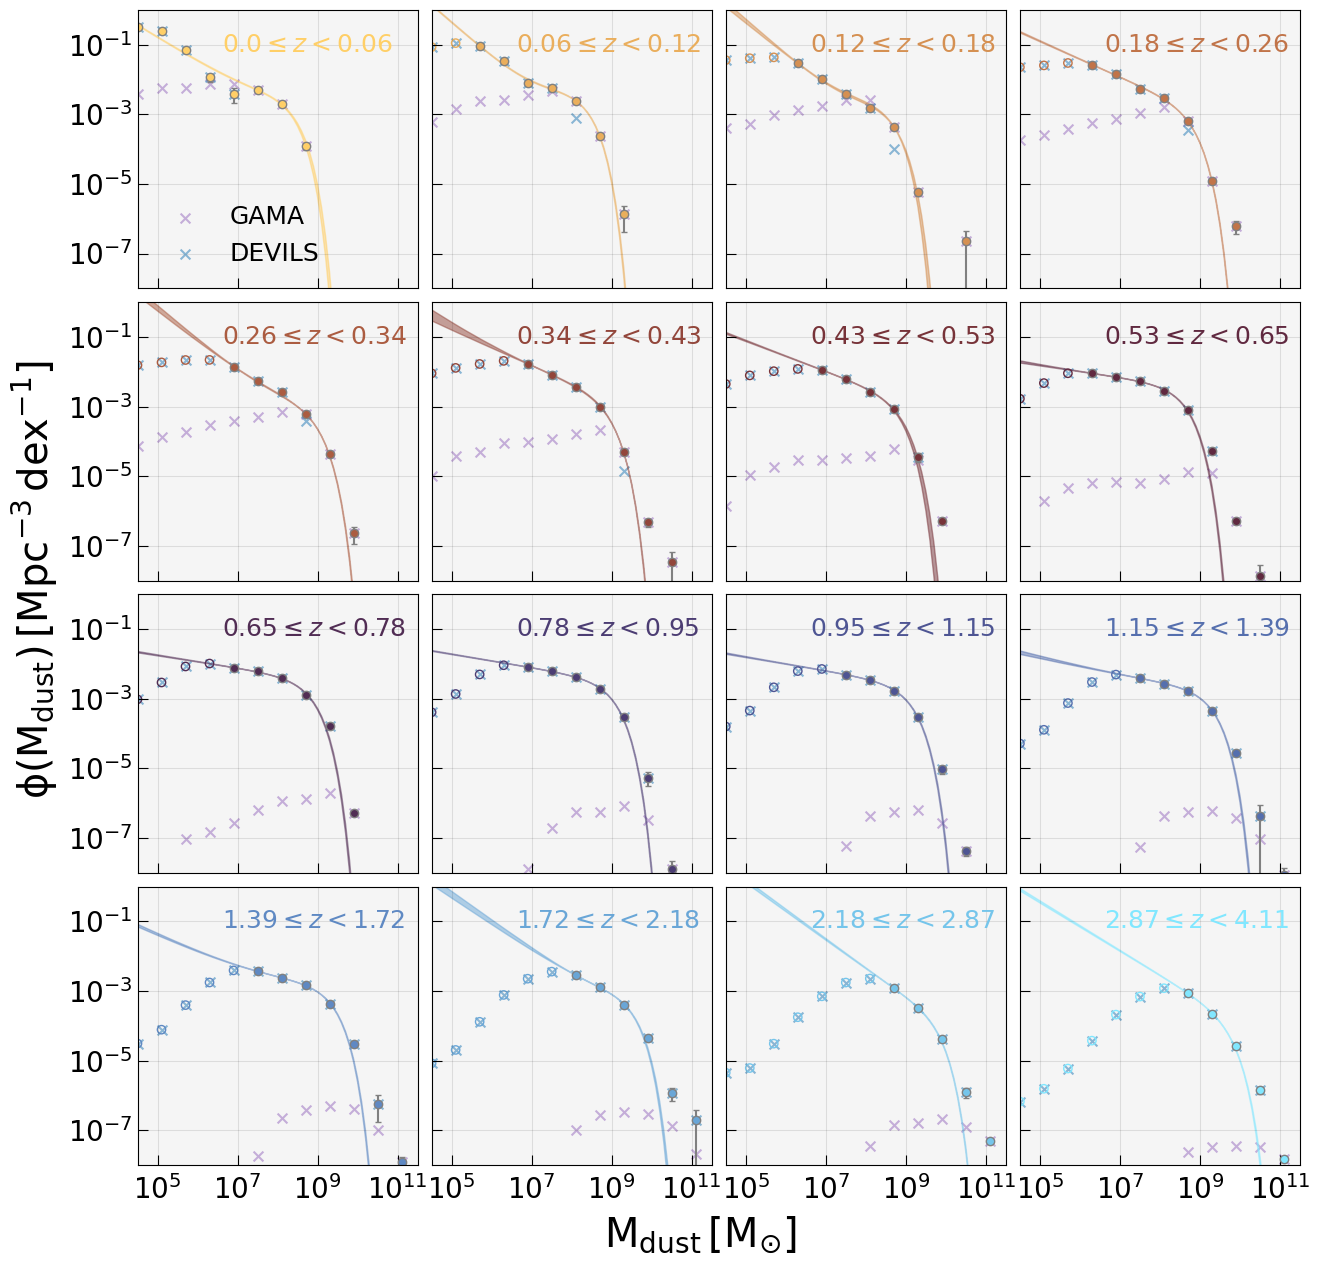

In [126]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(max([MidFactor(len(zmids)), len(zmids)/MidFactor(len(zmids))]), 
                       min([MidFactor(len(zmids)), len(zmids)/MidFactor(len(zmids))]), 
                       figsize = (15,15), constrained_layout = False, sharex=True, sharey=True)

handles = []
count = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):

        gama_handles = ax[i,j].scatter(
            10**dmf[count]["x"],
            dmf[count]["GAMA"],
            color = "tab:purple",
            marker = "x", 
            alpha = 0.5,
            s = 50,
            label = "GAMA"
        )
        devils_handles = ax[i,j].scatter(
            10**dmf[count]["x"],
            dmf[count]["DEVILS"],
            color = "tab:blue",
            marker = "x",
            alpha = 0.5,
            s = 50,
            label = "DEVILS"
        )
        if count == 1:
            handles.append(gama_handles)
            handles.append(devils_handles)
            
        ax[i,j].errorbar(
            10**dmf[count]["x"][dmf[count]["mlim"] == 1.0],
            dmf[count]["vmax"][dmf[count]["mlim"] == 1.0],
            yerr = dmf[count]["vmaxErr"][dmf[count]["mlim"] == 1.0], 
            fmt = "o",
            capsize = 2,
            markerfacecolor = colours[count],
            ecolor = "grey",
            markeredgecolor = "grey",
            alpha = 1.0
        )
        ax[i,j].scatter(
            10**dmf[count]["x"][dmf[count]["mlim"] == 0.0],
            dmf[count]["vmax"][dmf[count]["mlim"] == 0.0],
            facecolor = "none",
            edgecolor = colours[count]
        )
        ax[i,j].fill_between(
            x = dmf_fit[count]["x"],
            y1 = dmf_fit[count]["Q16"],
            y2 = dmf_fit[count]["Q84"],
            color = colours[count],
            alpha = 0.5
        )

        ax[i,j].text(
            0.3, 0.85, f"{round(zbins[count],2)}" + "$ \\leq z <$" f"{round(zbins[count+1],2)}", 
            transform = ax[i,j].transAxes, 
            fontsize = 18, 
            color = colours[count]
        )
        
        ax[i,j].set_facecolor('whitesmoke')  
        ax[i,j].grid(color = "black", alpha = 0.1)

                
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")
        
        ax[i,j].set_xlim([10**4.5, 10**11.5])
        ax[i,j].set_ylim([1e-8, 1.0])

        ax[i,j].set_xticks([10**5.0, 10**7.0, 10**9.0, 10**11.0])
        ax[i,j].set_yticks([10**-7, 10**-5, 10**-3, 10**-1])

        count += 1
        
ax[0,0].legend(handles = handles, loc = "lower left", frameon = False, fontsize = 18)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
fig.supxlabel(r"$\mathrm{M_{dust} \, [M_{\odot}]}$", y = 0.05)
fig.supylabel(r"$\mathrm{\phi(M_{dust}) \, [Mpc^{-3} \, dex^{-1}]}$", x = 0.04)
fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/dmf.pdf", dpi = 240, bbox_inches='tight')

## Redshift evol

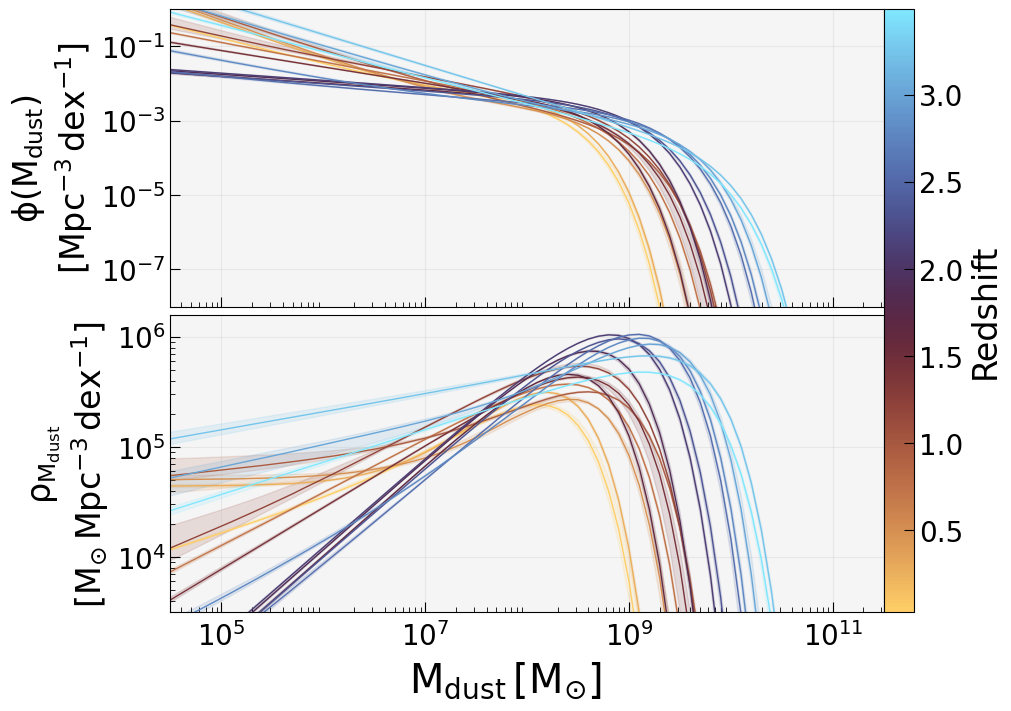

In [127]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(2, 1, figsize = (10, 7), constrained_layout = True, sharex = True)

for i in range(len(zmids)):
    ax[0].plot(
        dmf_fit[i]["x"],
        dmf_fit[i]["Q50"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[0].fill_between(
        x = dmf_fit[i]["x"],
        y1 = dmf_fit[i]["Q16"],
        y2 = dmf_fit[i]["Q84"],
        color = colours[i],
        alpha = 0.15
    )    

    ax[1].plot(
        dmf_fit[i]["x"],
        dmf_fit[i]["Q50"] * dmf_fit[i]["x"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[1].fill_between(
        x = dmf_fit[i]["x"],
        y1 = dmf_fit[i]["Q16"] * dmf_fit[i]["x"],
        y2 = dmf_fit[i]["Q84"] * dmf_fit[i]["x"],
        color = colours[i],
        alpha = 0.15
    )  

cmap = plt.cm.managua
norm = mpl.colors.Normalize(vmin=zmids.min(), vmax=zmids.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.1, pad=0.0)
cbar.set_label("Redshift")

ax[0].set_facecolor('whitesmoke')  
ax[1].set_facecolor('whitesmoke')  

ax[0].grid(alpha = 0.2)

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim([10**4.4, 10**11.5])
ax[0].set_xticks([10**5.0, 10**7.0, 10**9.0, 10**11.0])
ax[0].set_ylim([1e-8, 1.0])
ax[0].set_yticks([10**-7, 10**-5, 10**-3, 10**-1])

ax[1].grid(alpha = 0.2)

ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlim([10**4.5, 10**11.5])
ax[1].set_xticks([10**5.0, 10**7.0, 10**9.0, 10**11.0])
ax[1].set_ylim([10**3.5, 10**6.2])


fig.supxlabel(r"$\mathrm{M_{dust} \, [M_{\odot}]}$")
ax[0].set_ylabel(r"$\mathrm{\phi(M_{dust})}$" + "\n" + r"$\mathrm{[Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)
ax[1].set_ylabel(r"$\mathrm{\rho_{M_{dust}}}$" + "\n" + r"$\mathrm{[M_{\odot} \, Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)

fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/dmf_z.pdf", dpi = 240)

## SMF

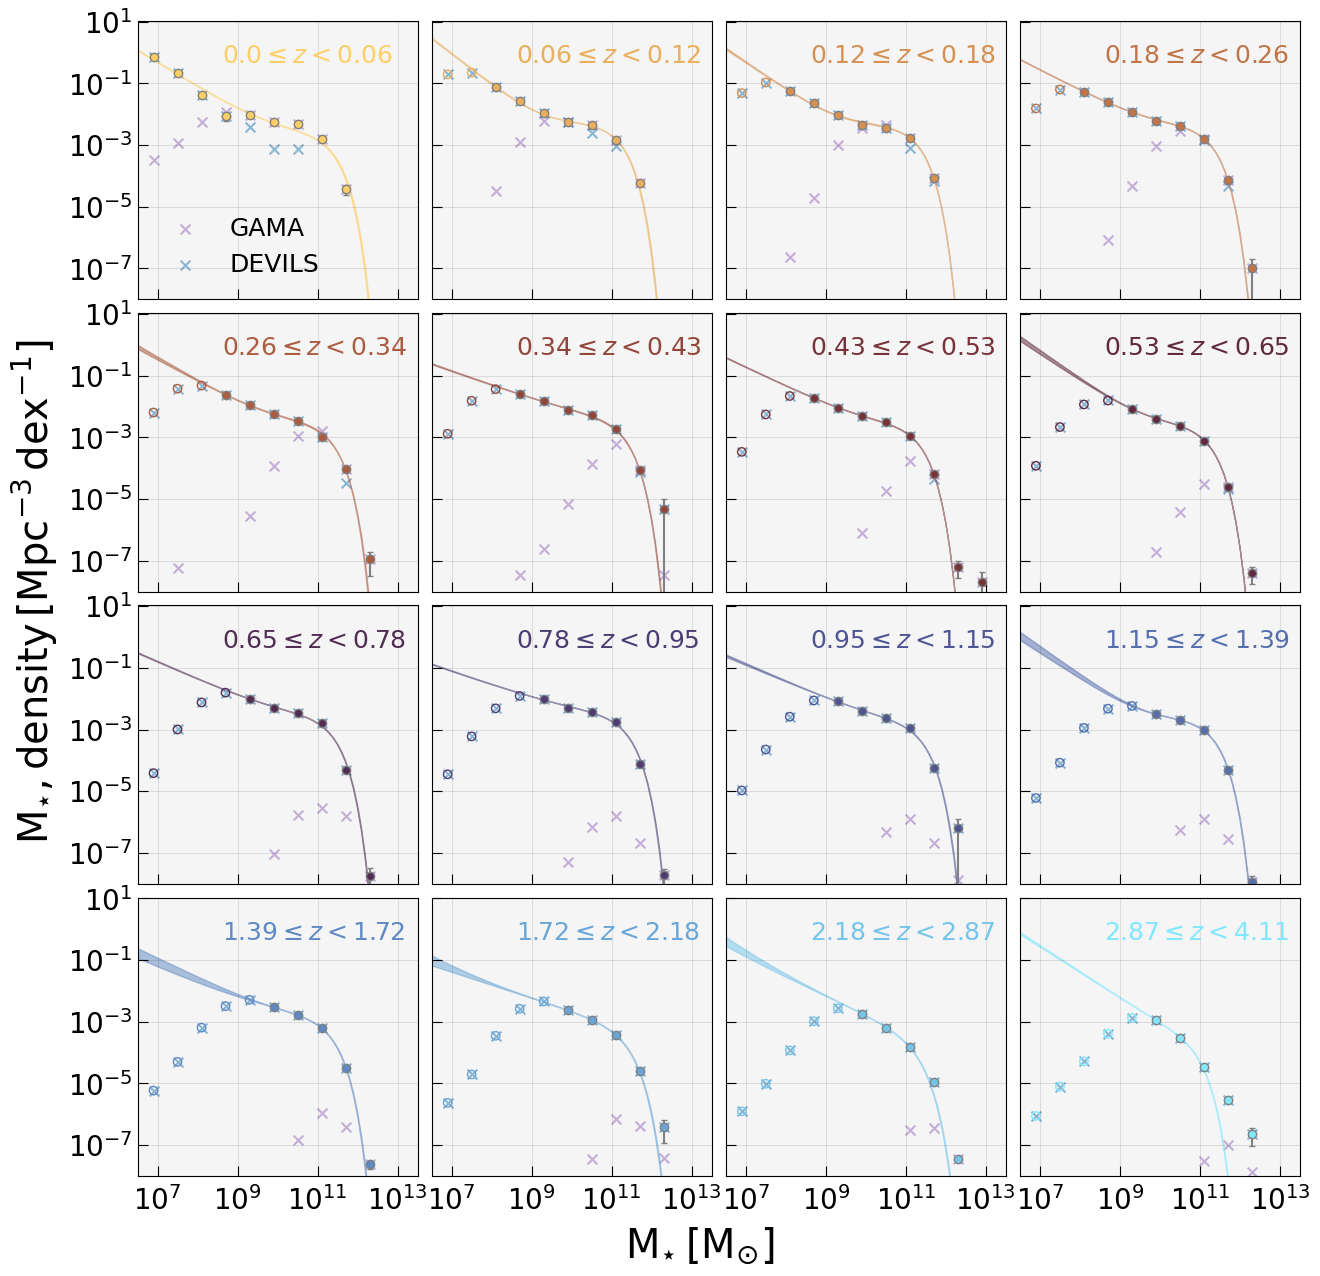

In [128]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(max([MidFactor(len(zmids)), len(zmids)/MidFactor(len(zmids))]), 
                       min([MidFactor(len(zmids)), len(zmids)/MidFactor(len(zmids))]), 
                       figsize = (15,15), constrained_layout = False, sharex=True, sharey=True)

handles = []
count = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):

        gama_handles = ax[i,j].scatter(
            10**smf[count]["x"],
            smf[count]["GAMA"],
            color = "tab:purple",
            marker = "x", 
            alpha = 0.5,
            s = 50,
            label = "GAMA"
        )
        devils_handles = ax[i,j].scatter(
            10**smf[count]["x"],
            smf[count]["DEVILS"],
            color = "tab:blue",
            marker = "x",
            alpha = 0.5,
            s = 50,
            label = "DEVILS"
        )
        if count == 1:
            handles.append(gama_handles)
            handles.append(devils_handles)
            
        ax[i,j].errorbar(
            10**smf[count]["x"][smf[count]["mlim"] == 1.0],
            smf[count]["vmax"][smf[count]["mlim"] == 1.0],
            yerr = smf[count]["vmaxErr"][smf[count]["mlim"] == 1.0], 
            fmt = "o",
            capsize = 2,
            markerfacecolor = colours[count],
            ecolor = "grey",
            markeredgecolor = "grey",
            alpha = 1.0
        )
        ax[i,j].scatter(
            10**smf[count]["x"][smf[count]["mlim"] == 0.0],
            smf[count]["vmax"][smf[count]["mlim"] == 0.0],
            facecolor = "none",
            edgecolor = colours[count]
        )
        ax[i,j].fill_between(
            x = smf_fit[count]["x"],
            y1 = smf_fit[count]["Q16"],
            y2 = smf_fit[count]["Q84"],
            color = colours[count],
            alpha = 0.5
        )

        ax[i,j].text(
            0.3, 0.85, f"{round(zbins[count],2)}" + "$ \\leq z <$" f"{round(zbins[count+1],2)}", 
            transform = ax[i,j].transAxes, 
            fontsize = 18, 
            color = colours[count]
        )
        
        ax[i,j].set_facecolor('whitesmoke')  
        ax[i,j].grid(color = "black", alpha = 0.1)

                
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")
        
        ax[i,j].set_xlim([10**6.5, 10**13.5])
        ax[i,j].set_ylim([1e-8, 10.5])

        ax[i,j].set_xticks([10**7.0, 10**9.0, 10**11.0, 10**13.0])
        ax[i,j].set_yticks([10**-7, 10**-5, 10**-3, 10**-1, 10**1])

        count += 1
        
ax[0,0].legend(handles = handles, loc = "lower left", frameon = False, fontsize = 18)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
fig.supxlabel(r"$\mathrm{M_{\star} \, [M_{\odot}]}$", y = 0.05)
fig.supylabel(r"$\mathrm{M_{\star}, density \, [Mpc^{-3} \, dex^{-1}]}$", x = 0.04)
fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/smf.pdf", dpi = 240, bbox_inches='tight')

## SMF evol

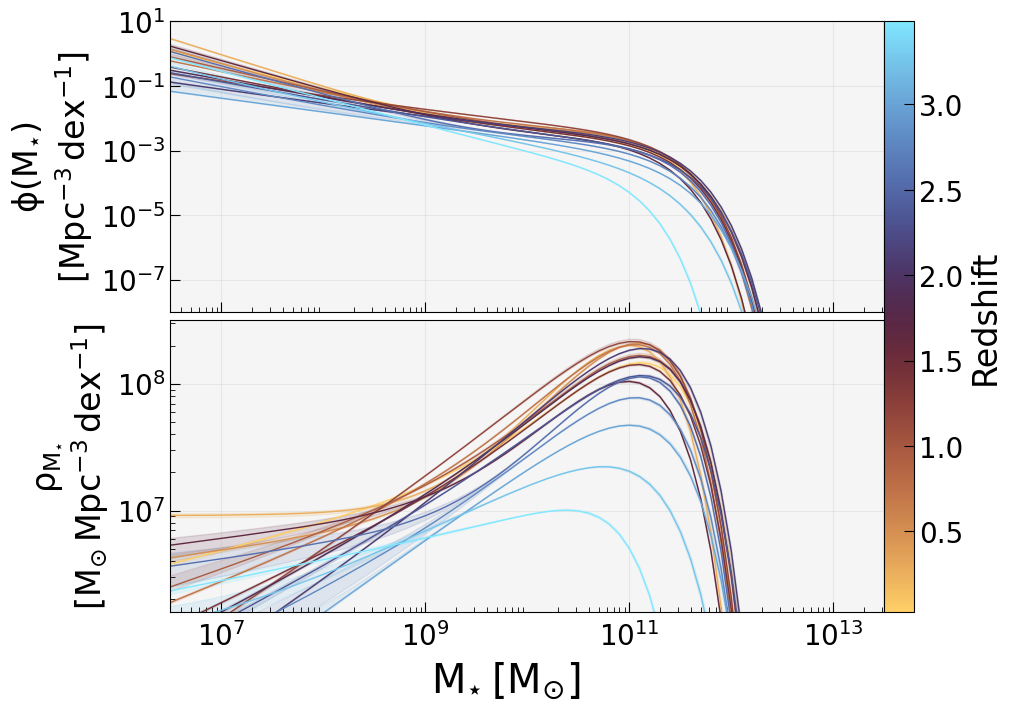

In [129]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(2, 1, figsize = (10, 7), constrained_layout = True, sharex = True)

for i in range(len(zmids)):
    ax[0].plot(
        smf_fit[i]["x"],
        smf_fit[i]["Q50"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[0].fill_between(
        x = smf_fit[i]["x"],
        y1 = smf_fit[i]["Q16"],
        y2 = smf_fit[i]["Q84"],
        color = colours[i],
        alpha = 0.15
    )    

    ax[1].plot(
        smf_fit[i]["x"],
        smf_fit[i]["Q50"] * smf_fit[i]["x"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[1].fill_between(
        x = smf_fit[i]["x"],
        y1 = smf_fit[i]["Q16"] * smf_fit[i]["x"],
        y2 = smf_fit[i]["Q84"] * smf_fit[i]["x"],
        color = colours[i],
        alpha = 0.15
    )  

cmap = plt.cm.managua
norm = mpl.colors.Normalize(vmin=zmids.min(), vmax=zmids.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.1, pad=0.0)
cbar.set_label("Redshift")

ax[0].set_facecolor('whitesmoke')  
ax[1].set_facecolor('whitesmoke')  

ax[0].grid(alpha = 0.2)

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim([10**6.5, 10**13.5])
ax[0].set_xticks([10**7.0, 10**9.0, 10**11.0, 10**13.0])
ax[0].set_ylim([1e-8, 10.5])
ax[0].set_yticks([10**-7, 10**-5, 10**-3, 10**-1, 10**1])

ax[1].grid(alpha = 0.2)

ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlim([10**6.5, 10**13.5])
ax[1].set_xticks([10**7.0, 10**9.0, 10**11.0, 10**13.0])
ax[1].set_ylim([10**6.2, 10**8.5])


fig.supxlabel(r"$\mathrm{M_{\star} \, [M_{\odot}]}$")
ax[0].set_ylabel(r"$\mathrm{\phi(M_{\star})}$" + "\n" + r"$\mathrm{[Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)
ax[1].set_ylabel(r"$\mathrm{\rho_{M_{\star}}}$" + "\n" + r"$\mathrm{[M_{\odot} \, Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)

fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/smf_z.pdf", dpi = 240)

## Luminosity function

In [ ]:
colours = get_n_colors(12, "managua")

fig, ax = plt.subplots(4, 3, figsize = (15,10), constrained_layout = True, sharex=True, sharey=True)

handles = []
count = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):

        gama_handles = ax[i,j].scatter(
            10**dlf[count]["x"],
            dlf[count]["GAMA"],
            color = "tab:purple",
            marker = "x", 
            alpha = 0.5,
            s = 50,
            label = "GAMA"
        )
        devils_handles = ax[i,j].scatter(
            10**dlf[count]["x"],
            dlf[count]["DEVILS"],
            color = "tab:blue",
            marker = "x",
            alpha = 0.5,
            s = 50,
            label = "DEVILS"
        )
        if count == 1:
            handles.append(gama_handles)
            handles.append(devils_handles)
            
        ax[i,j].errorbar(
            10**dlf[count]["x"][dlf[count]["mlim"] == 1.0],
            dlf[count]["vmax"][dlf[count]["mlim"] == 1.0],
            yerr = dlf[count]["vmaxErr"][dlf[count]["mlim"] == 1.0], 
            fmt = "o",
            capsize = 2,
            markerfacecolor = colours[count],
            ecolor = "grey",
            markeredgecolor = "grey",
            alpha = 1.0
        )
        ax[i,j].scatter(
            10**dlf[count]["x"][dlf[count]["mlim"] == 0.0],
            dlf[count]["vmax"][dlf[count]["mlim"] == 0.0],
            facecolor = "none",
            edgecolor = colours[count]
        )
        ax[i,j].fill_between(
            x = dlf_fit[count]["x"],
            y1 = dlf_fit[count]["Q16"],
            y2 = dlf_fit[count]["Q84"],
            color = colours[count],
            alpha = 0.5
        )

        ax[i,j].text(
            0.5, 0.85, f"{round(zbins[count],2)}" + "$ \\leq z <$" f"{round(zbins[count+1],2)}", 
            transform = ax[i,j].transAxes, 
            fontsize = 18, 
            color = colours[count]
        )
        
        ax[i,j].set_facecolor('whitesmoke')  
        ax[i,j].grid(color = "black", alpha = 0.1)
        
        ax[i,j].set_xlim([10**7.0, 10**14.0])
        ax[i,j].set_ylim([1e-8, 1.0])
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")
        count += 1
ax[0,0].legend(handles = handles, loc = "lower left", frameon = False, fontsize = 18)
fig.supxlabel(r"$\mathrm{L_{dust} \, [L_{\odot}]}$")
fig.supylabel(r"$\mathrm{\phi(L_{dust}) \, [Mpc^{-3} \, dex^{-1}]}$")

fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/dlf.pdf", dpi = 240)

## LF redshift evol

In [ ]:
colours = get_n_colors(12, "managua")

fig, ax = plt.subplots(2, 1, figsize = (10, 7), constrained_layout = True, sharex = True)

for i in range(len(zmids)):
    ax[0].plot(
        dlf_fit[i]["x"],
        dlf_fit[i]["Q50"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[0].fill_between(
        x = dlf_fit[i]["x"],
        y1 = dlf_fit[i]["Q16"],
        y2 = dlf_fit[i]["Q84"],
        color = colours[i],
        alpha = 0.15
    )    

    ax[1].plot(
        dlf_fit[i]["x"],
        dlf_fit[i]["Q50"] * dlf_fit[i]["x"],
        lw = 1,
        color = colours[i],
        alpha = 1.0
    )   
    ax[1].fill_between(
        x = dlf_fit[i]["x"],
        y1 = dlf_fit[i]["Q16"] * dlf_fit[i]["x"],
        y2 = dlf_fit[i]["Q84"] * dlf_fit[i]["x"],
        color = colours[i],
        alpha = 0.15
    )  

cmap = plt.cm.managua
norm = mpl.colors.Normalize(vmin=zmids.min(), vmax=zmids.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.1, pad=0.0)
cbar.set_label("Redshift")

ax[0].set_facecolor('whitesmoke')  
ax[1].set_facecolor('whitesmoke')

ax[0].grid(alpha = 0.2)
ax[0].set_xlim([10**7.0, 10**14.0])
ax[0].set_ylim([1e-8, 1.0])
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].grid(alpha = 0.2)
ax[1].set_xlim([10**7.0, 10**14.0])
ax[1].set_ylim([10**6, 10**9])
ax[1].set_xscale("log")
ax[1].set_yscale("log")

fig.supxlabel(r"$\mathrm{L_{dust} \, [L_{\odot}]}$")
ax[0].set_ylabel(r"$\mathrm{\phi(L_{dust})}$" + "\n" + r"$\mathrm{[Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)
ax[1].set_ylabel(r"$\mathrm{\rho_{L_{dust}}}$" + "\n" + r"$\mathrm{[L_{\odot} \, Mpc^{-3} \, dex^{-1}]}$", fontsize = 24)

fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/dlf_z.pdf", dpi = 240)

# Cosmic densities

In [130]:
cosmic_Mdust = pd.read_hdf(h5file, "cosmic/Mdust")
cosmic_Mdust_gama = pd.read_hdf(h5file, "cosmic/Mdust_gama")
cosmic_Mdust_devils = pd.read_hdf(h5file, "cosmic/Mdust_devils")
cosmic_MdustwAGN = pd.read_hdf(h5file, "cosmic/MdustwAGN")
cosmic_Mstar = pd.read_hdf(h5file, "cosmic/Mstar")

In [131]:
driver18 = pd.read_csv("/Users/22252335/Documents/DustMassDensity/data/literature_evo/cdmh/driver18.csv")

dsilva25 = pd.read_csv("/Users/22252335/Documents/DustMassDensity/data/literature_evo/csfh/DSilva25_CSFH_CAGNH_fit.csv")
driver18_csmd = pd.read_csv("/Users/22252335/Documents/DustMassDensity/data/literature_evo/csmh/driver2018.csv")

driver25_ebl_dust = pd.read_csv("/Users/22252335/Desktop/simon_dust.csv")

## Stellar mass density

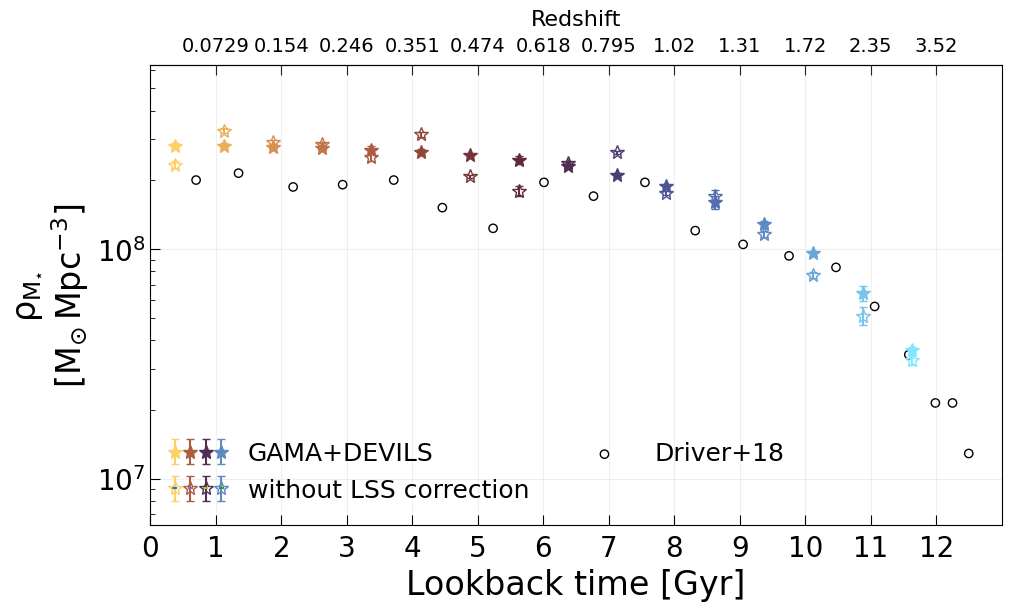

In [132]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(1, 1, figsize = (10, 6), constrained_layout = True)

mstar_handles = []
mstar_lss_handles = []

for i in range(len(zmids)):
    mstar_ = ax.errorbar(
        lbtmids[i], 
        cosmic_Mstar["Q50"][i] * LSSCorrection[i], 
        yerr = cosmic_Mstar["ERR"][i],
        color = colours[i],
        marker = "*",
        markersize = 10,
        capsize = 3
    )

    mstar_lss_ = ax.errorbar(
        lbtmids[i], 
        cosmic_Mstar["Q50"][i], 
        yerr = cosmic_Mstar["ERR"][i],
        ecolor = colours[i],
        markeredgecolor = colours[i],
        markerfacecolor = "none",
        marker = "*",
        markersize = 10,
        capsize = 3
    )
    if i % MidFactor(len(zmids)) == 0:
        mstar_handles.append(mstar_)
        mstar_lss_handles.append(mstar_lss_)

driver18_ = ax.scatter(
    Planck18.lookback_time(driver18_csmd["z"]).value,
    10**driver18_csmd["csmd"], 
    edgecolor = "black",
    facecolor = "none", 
    label = "Driver+18"
)

ax.grid(alpha = 0.2)

ax.legend(
    handles = [tuple(mstar_handles), tuple(mstar_lss_handles), driver18_], 
    labels = ["GAMA+DEVILS", "without LSS correction", driver18_.get_label()], 
    handler_map={tuple: HandlerTuple(ndivide=None, pad=0.5)}, 
    handletextpad=1.0,
    fontsize = 18,
    frameon = False, 
    fancybox = False, 
    ncol = 2,
    facecolor = "whitesmoke"
)
ax.set_xlim([0,13])
ax.set_xticks([0.0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_ylim([10**6.8, 10**8.8])
ax.set_yscale("log")

ax_top = ax.secondary_xaxis('top')
z_ticks = z_at_value(Planck18.lookback_time, np.array([1,2,3,4,5,6,7,8,9,10,11,12]) * u.Gyr)
ax_top.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax_top.set_xticklabels([f"{a:.3}" for a in z_ticks.value], fontsize = 14, rotation = 0)
ax_top.set_xlabel("Redshift", labelpad=8.0, fontsize = 16)

ax.set_xlabel("Lookback time [Gyr]")
ax.set_ylabel(r"$\mathrm{\rho_{M_{\star}}}$" + "\n" + r"$\mathrm{[M_{\odot} \, Mpc^{-3}]}$", fontsize = 24)

fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/csmh.pdf", dpi = 240, bbox_inches = 'tight')

## Dust mass density

In [133]:
EddingtonCorrection

array([1.0077081 , 0.83067851, 0.80276574, 1.04333167, 0.81446106,
       1.10798428, 1.22193137, 1.54139681, 1.32225395, 1.32742975,
       1.37600747, 1.3915823 , 1.56767241, 1.31586384, 0.84089148,
       1.00380657])

/var/folders/fc/q4q87pkn1q79cx2_cvwxq0h1skwkx0/T/ipykernel_4519/1572558797.py:97: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 5
  ax.legend(


Text(0, 0.5, '$\\mathrm{\\rho_{M_{dust}}}$\n$\\mathrm{[M_{\\odot} \\, Mpc^{-3}]}$')

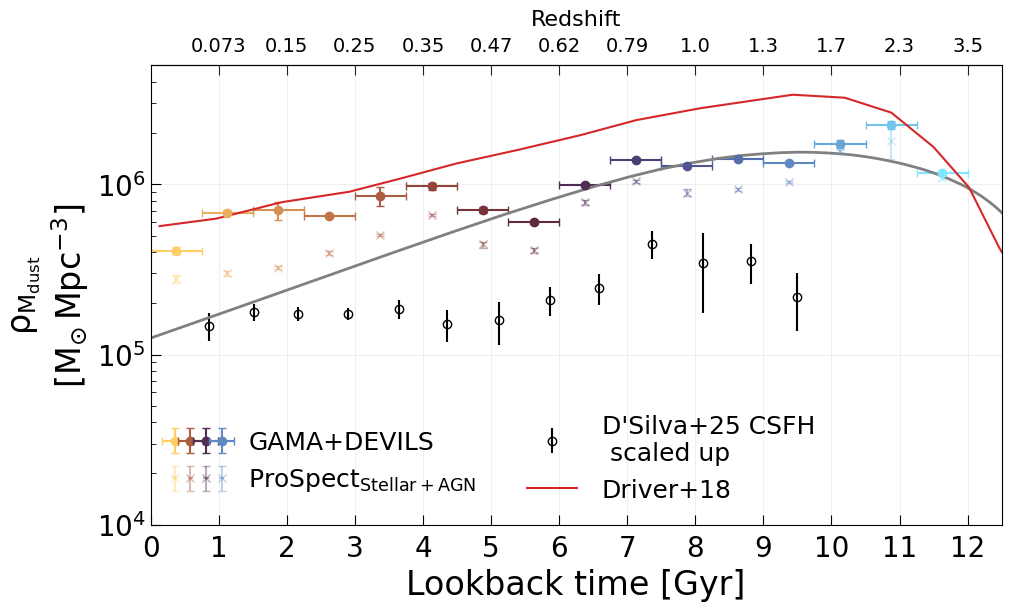

In [136]:
colours = get_n_colors(len(zmids), "managua")

fig, ax = plt.subplots(1, 1, figsize = (10, 6), constrained_layout = True)

dust_handles = []
dustwAGN_handles = []
dust_lim_handles = []

for i in range(len(zmids)):
    
    dust_leg = ax.errorbar(
        lbtmids[i], 
        cosmic_Mdust["Q50"][i], 
        xerr = abs(lbtbins[1] - lbtbins[0])/2.0,
        yerr = cosmic_Mdust["ERR"][i],
        color = colours[i],
        marker = "o",
        capsize = 3
    )

    # uplim_ = ax.scatter(
    #     lbtmids[i], 
    #     cosmic_Mdust["Q50_lim"][i], 
    #     color = colours[i],
    #     marker = "^"
    # )

    dustwAGN_leg = ax.errorbar(
        lbtmids[i], 
        cosmic_MdustwAGN["Q50"][i], 
        yerr = cosmic_MdustwAGN["ERR"][i],
        color = colours[i],
        marker = "x",
        alpha = 0.4,
        capsize = 3
    )

    if i % MidFactor(len(zmids)) == 0:
        dust_handles.append(dust_leg)
        dustwAGN_handles.append(dustwAGN_leg)
        # dust_lim_handles.append(uplim_)

# devils_ = ax.errorbar(
#     lbtmids[zmids>0.1],
#     cosmic_Mdust_devils["Q50"][zmids>0.1]  * LSSCorrection[zmids>0.1] * 1/EddingtonCorrection[zmids>0.1],
#     yerr = cosmic_Mdust_devils["ERR"][zmids>0.1]  * LSSCorrection[i] * 1/EddingtonCorrection[zmids>0.1],
#     fmt = "s",
#     ecolor = "tab:blue",
#     markeredgecolor = "tab:blue",
#     markerfacecolor = "none",
#     label = "DEVILS",
#     markersize = 10,
# )
# gama_ = ax.errorbar(
#     lbtmids[zmids<0.1],
#     cosmic_Mdust_devils["Q50"][zmids<0.1],
#     yerr = cosmic_Mdust_devils["ERR"][zmids<0.1],
#     fmt = "s",
#     ecolor = "tab:purple",
#     markeredgecolor = "tab:purple",
#     markerfacecolor = "none",
#     label = "GAMA",
#     markersize = 10,
# )

driver18_ = ax.errorbar(
    driver18["lbt"],
    driver18["cdmh"],
    yerr = driver18["err"],
    fmt = "o",
    capsize = 0,
    markeredgecolor = "black",
    markerfacecolor = "none",
    ecolor = "black",
    label = "Driver+18"
)

dsilva25_csfh_, = ax.plot(
    Planck18.lookback_time(dsilva25["z"]).value,
    pow(10, dsilva25["CSFHQ50"]) * 2e7, 
    lw = 2, 
    color = "grey", 
    label = "D'Silva+25 CSFH \n scaled up"
)

driver25_, = ax.plot(
    driver25_ebl_dust["X"],
    10**driver25_ebl_dust["Y"],
    color = "tab:red", 
    label = "Driver+25 EBL"
)

ax.grid(
    alpha = 0.2
)

ax.legend(
    handles = [tuple(dust_handles), 
               tuple(dustwAGN_handles), 
               # devils_, gama_, 
               # dsilva25_csfh_, 
               driver18_, driver25_], 
    labels = ["GAMA+DEVILS", 
              r"$\mathrm{ProSpect_{Stellar+AGN}}$", 
              # devils_.get_label(), gama_.get_label(), 
              dsilva25_csfh_.get_label(), 
              driver18_.get_label(), driver25_.get_label()], 
    handler_map={tuple: HandlerTuple(ndivide=None, pad=0.5)}, 
    handletextpad=1.0,
    fontsize = 18,
    frameon = False, 
    fancybox = False, 
    ncol = 2,
    facecolor = "whitesmoke"
)

ax.set_xlim([0,12.5])
ax.set_xticks([0.0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_ylim([10**4.0, 10**6.7])
ax.set_yscale("log")

ax_top = ax.secondary_xaxis('top')
z_ticks = z_at_value(Planck18.lookback_time, np.array([1,2,3,4,5,6,7,8,9,10,11,12]) * u.Gyr)
ax_top.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax_top.set_xticklabels([f"{a:.2}" for a in z_ticks.value], fontsize = 14, rotation = 0)
ax_top.set_xlabel("Redshift", labelpad=8.0, fontsize = 16)

ax.set_xlabel("Lookback time [Gyr]")
ax.set_ylabel(r"$\mathrm{\rho_{M_{dust}}}$" + "\n" + r"$\mathrm{[M_{\odot} \, Mpc^{-3}]}$", fontsize = 24)
# fig.savefig("/Users/22252335/Documents/DustMassDensity/plots/cosmic_dust.pdf", dpi = 240)